In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.callbacks import EarlyStopping
import seaborn as sns

# Load data
df = pd.read_csv("cover_data.csv")
print(df.head())
print(df.columns)
print(df["class"].value_counts())
print(df.info())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [21]:
# Split data
x = df.drop("class", axis=1)
y = df["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
# Build model
model = Sequential()
model.add(Input(shape=(54,)))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               7040      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
Total params: 15816 (61.78 KB)
Trainable params: 15816 (61.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Compile and train model
es = EarlyStopping(monitor="val_loss", mode="min", patience=3)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=100, batch_size=512, validation_split=0.2, callbacks=[es])

Epoch 1/100
727/727 [==============================] - 2s 2ms/step - loss: 0.7291 - accuracy: 0.6969 - val_loss: 0.5834 - val_accuracy: 0.7484
Epoch 2/100
727/727 [==============================] - 1s 2ms/step - loss: 0.5948 - accuracy: 0.7443 - val_loss: 0.5325 - val_accuracy: 0.7681
Epoch 3/100
727/727 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7602 - val_loss: 0.4986 - val_accuracy: 0.7837
Epoch 4/100
727/727 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.7709 - val_loss: 0.4751 - val_accuracy: 0.7986
Epoch 5/100
727/727 [==============================] - 1s 2ms/step - loss: 0.5126 - accuracy: 0.7796 - val_loss: 0.4587 - val_accuracy: 0.8076
Epoch 6/100
727/727 [==============================] - 1s 2ms/step - loss: 0.4986 - accuracy: 0.7868 - val_loss: 0.4450 - val_accuracy: 0.8134
Epoch 7/100
727/727 [==============================] - 1s 2ms/step - loss: 0.4871 - accuracy: 0.7924 - val_loss: 0.4317 - val_accuracy: 0.8224

In [25]:
# Evaluate and predict
loss, acc = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {acc}")

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
class_names = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]

3632/3632 [==============================] - 2s 580us/step - loss: 0.3088 - accuracy: 0.8767
Test loss: 0.30876195430755615
Test accuracy: 0.8766899108886719
3632/3632 [==============================] - 2s 516us/step


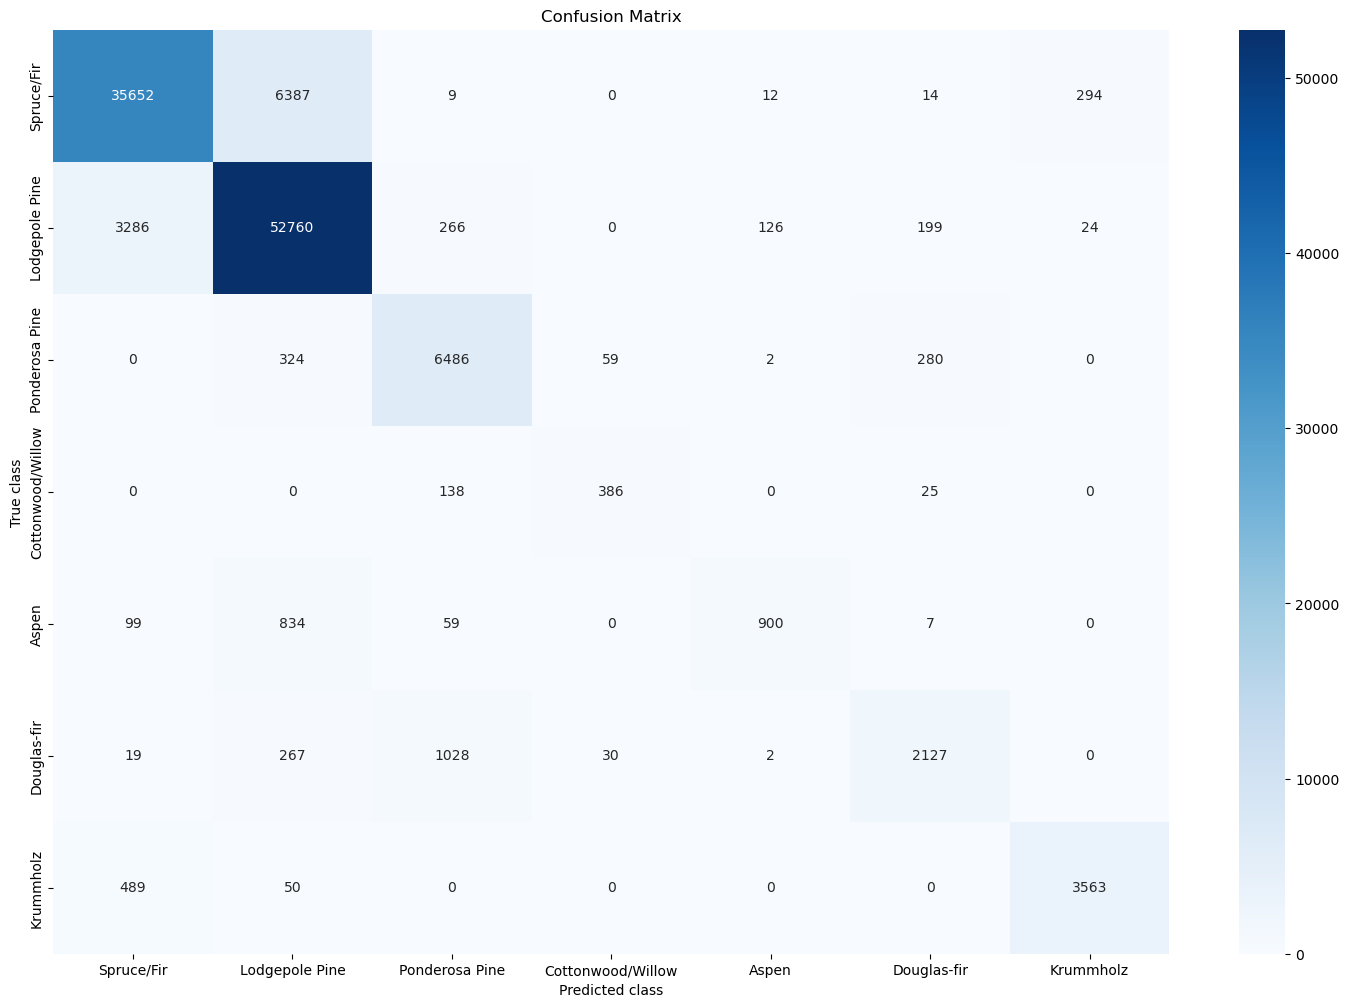

In [37]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(18, 12))
heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel("Predicted class")
ax.set_ylabel("True class")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
heatmapfig = heatmap.get_figure()
heatmapfig.savefig("confusion_matrix.png")

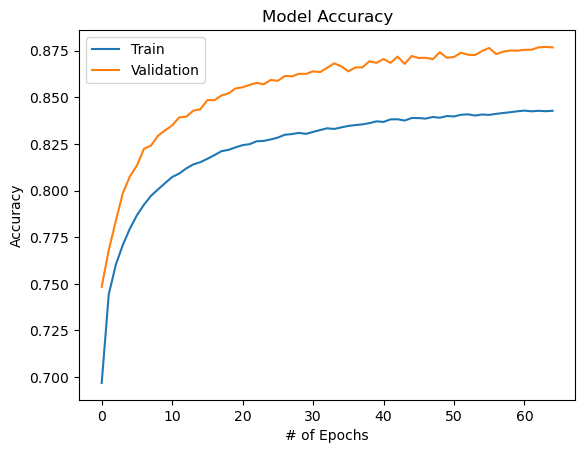

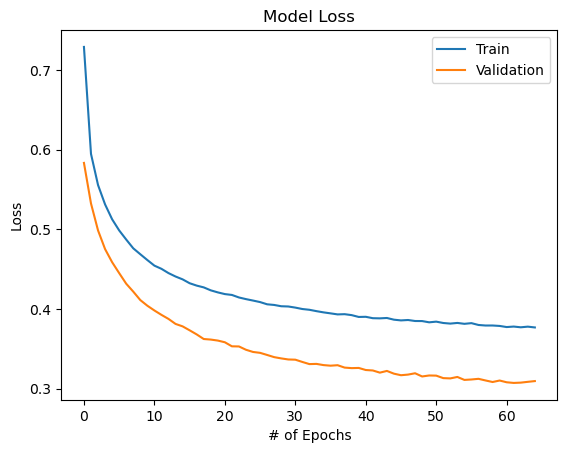

In [29]:
# Plot accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("# of Epochs")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("# of Epochs")
plt.legend(["Train", "Validation"], loc='upper right')
plt.show()